DeepSMILESPredictor

2024-10-26 17:24:11,826 - INFO - Processing 0/10812 SMILES


Calculate with: NVIDIA GeForce MX150


2024-10-26 17:24:16,360 - INFO - Processing 1000/10812 SMILES
2024-10-26 17:24:20,494 - INFO - Processing 2000/10812 SMILES
2024-10-26 17:24:25,587 - INFO - Processing 3000/10812 SMILES
2024-10-26 17:24:29,980 - INFO - Processing 4000/10812 SMILES
2024-10-26 17:24:33,999 - INFO - Processing 5000/10812 SMILES
2024-10-26 17:24:38,210 - INFO - Processing 6000/10812 SMILES
[17:24:40] WARNING: not removing hydrogen atom without neighbors
2024-10-26 17:24:42,375 - INFO - Processing 7000/10812 SMILES
2024-10-26 17:24:46,495 - INFO - Processing 8000/10812 SMILES
2024-10-26 17:24:50,534 - INFO - Processing 9000/10812 SMILES
2024-10-26 17:24:54,663 - INFO - Processing 10000/10812 SMILES
2024-10-26 17:24:58,106 - INFO - Processing 0/4564 AXL-Kinase-Inhibitor SMILES
2024-10-26 17:24:58,800 - INFO - Processing 100/4564 AXL-Kinase-Inhibitor SMILES
2024-10-26 17:24:59,354 - INFO - Processing 200/4564 AXL-Kinase-Inhibitor SMILES
2024-10-26 17:24:59,955 - INFO - Processing 300/4564 AXL-Kinase-Inhibitor

0    32436
1    27384
Name: Target, dtype: int64
        AlogP  PolarSurfaceArea  HBA  HBD       Chi0     Kappa1    TPSA  \
22503  3.1586            156.02    9    4  31.827334  29.900984  156.02   
37039 -0.1114             52.60    4    0   7.983128   8.680000   52.60   
50245  1.4332            119.31    9    2  19.509861  17.776892  119.31   
10890  6.7278            110.30    7    1  34.655761  32.816110  110.30   
56425  2.0546             25.25    2    0   8.225768   7.468189   25.25   

       MolLogP  PEOE_VSA1  PEOE_VSA2  ...  FP_2038  FP_2039  FP_2040  FP_2041  \
22503   3.1586  30.276787  14.687756  ...        0        0        0        0   
37039  -0.1114   9.473726   0.000000  ...        0        0        0        0   
50245   1.4332  26.004017   0.000000  ...        0        0        0        0   
10890   6.7278  24.427287  14.573053  ...        0        0        0        0   
56425   2.0546   0.000000   9.976383  ...        0        0        0        0   

       FP_204

2024-10-26 17:25:55,264 - INFO - Epoch 1/150, Loss: 0.1281
2024-10-26 17:25:58,540 - INFO - Training Accuracy: CHEMBL: 81.63%, AXL: 94.78%
2024-10-26 17:25:59,474 - INFO - Test Accuracy: CHEMBL: 82.19%, AXL: 95.26%

2024-10-26 17:26:05,521 - INFO - Epoch 2/150, Loss: 0.0714
2024-10-26 17:26:07,926 - INFO - Training Accuracy: CHEMBL: 88.84%, AXL: 97.08%
2024-10-26 17:26:08,485 - INFO - Test Accuracy: CHEMBL: 89.59%, AXL: 97.34%

2024-10-26 17:26:13,737 - INFO - Epoch 3/150, Loss: 0.0498
2024-10-26 17:26:15,783 - INFO - Training Accuracy: CHEMBL: 93.34%, AXL: 97.30%
2024-10-26 17:26:16,397 - INFO - Test Accuracy: CHEMBL: 93.61%, AXL: 97.34%

2024-10-26 17:26:23,344 - INFO - Epoch 4/150, Loss: 0.0374
2024-10-26 17:26:25,254 - INFO - Training Accuracy: CHEMBL: 96.65%, AXL: 95.79%
2024-10-26 17:26:25,790 - INFO - Test Accuracy: CHEMBL: 97.02%, AXL: 95.81%

2024-10-26 17:26:32,404 - INFO - Epoch 5/150, Loss: 0.0307
2024-10-26 17:26:35,575 - INFO - Training Accuracy: CHEMBL: 96.22%, AXL: 96.9

Early stopping activated. Test accuracies reached: CHEMBL 97.23%, AXL 100.00%.
train: (0.04922014183581453, 0.9847858177627472)
test: (0.05031483937403496, 0.9848707665734112)

 Modell erfolgreich gespeichert unter: C:\Users\SchockWav3\Desktop\müll.pth


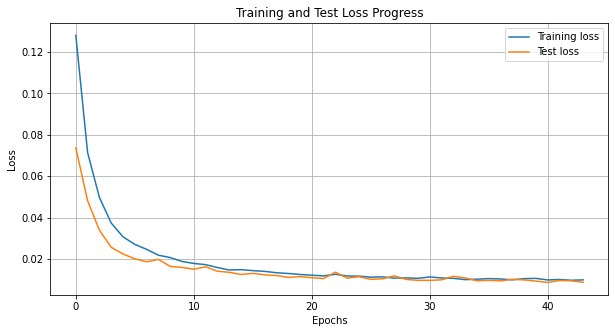

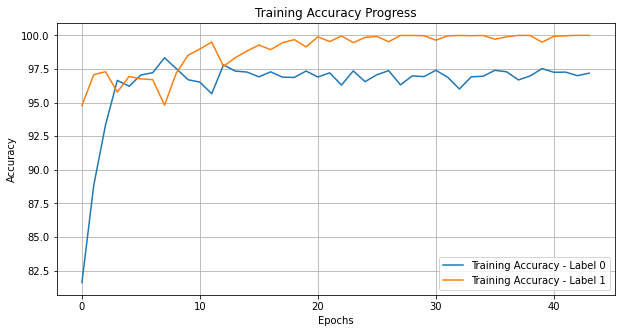

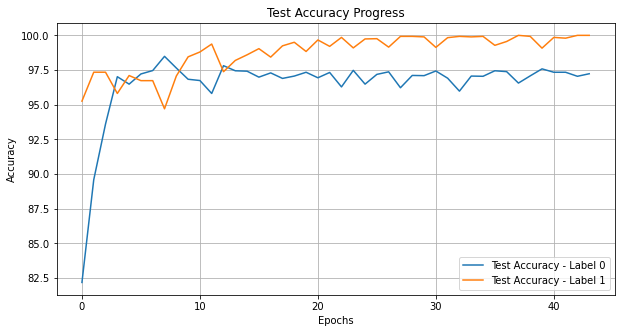

predict: 100%|██████████| 748/748 [00:05<00:00, 126.92it/s]
torch.Size([47856]) torch.Size([47856])
predict: 100%|██████████| 187/187 [00:01<00:00, 147.81it/s]
torch.Size([11964]) torch.Size([11964])


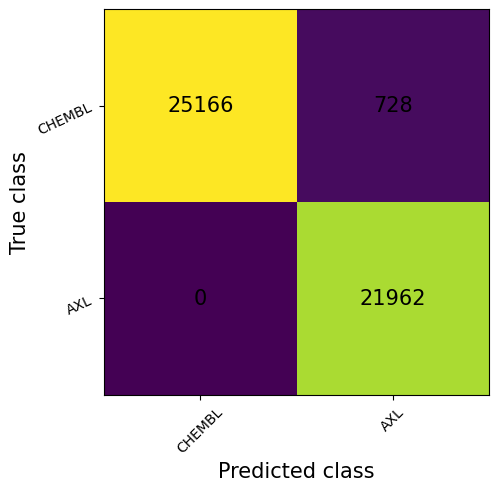

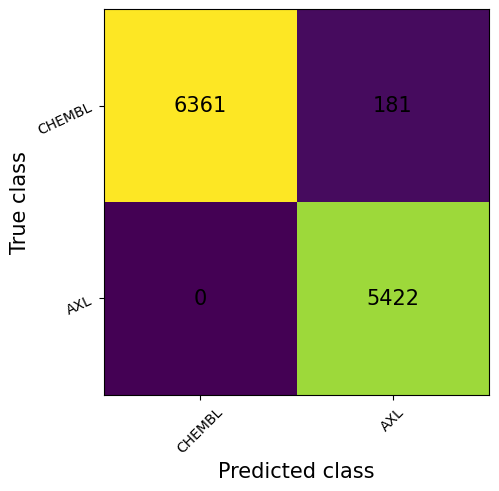

In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem, rdMolDescriptors, rdPartialCharges
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import logging
import matplotlib.pyplot as plt
from torchmetrics.classification import MulticlassConfusionMatrix
from tqdm import tqdm
import sys


# User-defined parameters
SMILES_DATA_PATH = 'C:\\Users\\SchockWav3\\Desktop\\Masterarbeit\\chembl_smiles.txt'
SMILES_AXL_INHIBITORS_PATH = 'C:\\Users\\SchockWav3\\Desktop\\Masterarbeit\\ChemblNIHDatensatzAXLKinase.txt'
SAVE_MODEL_PATH = 'C:\\Users\\SchockWav3\\Desktop\müll.pth'
BATCH_SIZE = 64
LEARNING_RATE = 0.00005
NUM_EPOCHS = 150
EARLY_STOPPING_ACTIVE = True
TARGET_ACCURACY_CHEMBL = 97.2
TARGET_ACCURACY_AXL = 99.9
AXL_MULTIPLIER = 6  
COMPOUND_MULTIPLIER = 3



# 1. Set device for computation (GPU if available, otherwise CPU)
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Calculate with: {torch.cuda.get_device_name(0)}")

else:
    device = torch.device("cpu")
    print(f"Calculate with: {device}")


# Function to read SMILES strings from a .txt file
def load_data(file_path):
    with open(file_path, 'r') as file:
        smiles_list = file.read().splitlines()
    return smiles_list


# 2. Define file paths for the datasets
smiles_data_path = SMILES_DATA_PATH    
smiles_axl_inhibitors_path = SMILES_AXL_INHIBITORS_PATH


# Load SMILES data
smiles_data = load_data(smiles_data_path)
smiles_axl_inhibitors = load_data(smiles_axl_inhibitors_path)



# 3. Function to calculate descriptors for a given SMILES string
def calculate_descriptors(smiles):
    """
    Calculates molecular descriptors and Morgan fingerprints for a given SMILES string.

    Args:
        smiles (str): A SMILES string representing a chemical compound.

    Returns:
        dict: A dictionary containing calculated descriptors and fingerprints.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # If the SMILES string is invalid, skip it
    
    descriptors = {
        "MorganFingerprint":    AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048),
        "AlogP":                Descriptors.MolLogP(mol),
        "PolarSurfaceArea":     Descriptors.TPSA(mol),
        "HBA":                  Descriptors.NumHAcceptors(mol),
        "HBD":                  Descriptors.NumHDonors(mol),
        "Chi0":                 Descriptors.Chi0(mol),
        "Kappa1":               Descriptors.Kappa1(mol),
        "TPSA":                 Descriptors.TPSA(mol),
        "MolLogP":              Descriptors.MolLogP(mol),
        "PEOE_VSA1":            Descriptors.PEOE_VSA1(mol),
        "PEOE_VSA2":            Descriptors.PEOE_VSA2(mol),
        "PEOE_VSA3":            Descriptors.PEOE_VSA3(mol),
        "PEOE_VSA4":            Descriptors.PEOE_VSA4(mol),
        "PEOE_VSA5":            Descriptors.PEOE_VSA5(mol),
        "PEOE_VSA6":            Descriptors.PEOE_VSA6(mol),
        "PEOE_VSA7":            Descriptors.PEOE_VSA7(mol),
        "PEOE_VSA8":            Descriptors.PEOE_VSA8(mol),
        "PEOE_VSA9":            Descriptors.PEOE_VSA9(mol),
        "PEOE_VSA10":           Descriptors.PEOE_VSA10(mol),
        "PEOE_VSA11":           Descriptors.PEOE_VSA11(mol),
        "PEOE_VSA12":           Descriptors.PEOE_VSA12(mol),
        "PEOE_VSA13":           Descriptors.PEOE_VSA13(mol),
        "PEOE_VSA14":           Descriptors.PEOE_VSA14(mol),
        "MolecularWeight":      Descriptors.MolWt(mol),
        "NumRotatableBonds":    Descriptors.NumRotatableBonds(mol),
        "NumAromaticRings":     Descriptors.NumAromaticRings(mol),
        #"MaxPartialCharge":     max_partial_charge,
        #"MinPartialCharge":     min_partial_charge,
        "FractionCSP3":         Descriptors.FractionCSP3(mol),
        #"RadiusOfGyration":     rdMolDescriptors.CalcRadiusOfGyration(mol),
        #"Polarizability":       rdMolDescriptors.CalcExactMolWt(mol),
        #"MolVolume":            Descriptors.MolWt(mol),
        #"MolWt":                Descriptors.MolWt(mol),
        "HeavyAtomCount":       Descriptors.HeavyAtomCount(mol),
        "NHOHCount":            Descriptors.NHOHCount(mol),
        "NOCount":              Descriptors.NOCount(mol),
        "NumHeteroatoms":       Descriptors.NumHeteroatoms(mol),
        "NumRadicalElectrons":  Descriptors.NumRadicalElectrons(mol),
        "NumValenceElectrons":  Descriptors.NumValenceElectrons(mol),
        "RingCount":            Descriptors.RingCount(mol),
        "BalabanJ":             Descriptors.BalabanJ(mol),
        "BertzCT":              Descriptors.BertzCT(mol),
        "Chi1":                 Descriptors.Chi1(mol),
        "Chi0n":                Descriptors.Chi0n(mol),
        "Chi0v":                Descriptors.Chi0v(mol),
        "Chi1n":                Descriptors.Chi1n(mol),
        "Chi1v":                Descriptors.Chi1v(mol),
        "Kappa2":               Descriptors.Kappa2(mol),
        "Kappa3":               Descriptors.Kappa3(mol),
        "HallKierAlpha":        Descriptors.HallKierAlpha(mol),
    }
    return descriptors


# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
 

# Calculate descriptors for the loaded SMILES data
data = []

for index, smiles in enumerate(smiles_data):
    if index % 1000 == 0:
        logging.info(f"Processing {index}/{len(smiles_data)} SMILES")
    descriptors = calculate_descriptors(smiles)
    if descriptors is not None:
        descriptors["SMILES"] = smiles
        descriptors["Target"] = 0  # Other molecules
        data.append(descriptors)


for index, smiles in enumerate(smiles_axl_inhibitors):
    if index % 100 == 0:
        logging.info(f"Processing {index}/{len(smiles_axl_inhibitors)} AXL-Kinase-Inhibitor SMILES")
    descriptors = calculate_descriptors(smiles)
    if descriptors is not None:
        descriptors["SMILES"] = smiles
        descriptors["Target"] = 1  # AXL-Kinase-Inhibitors
        data.append(descriptors)


# Create a DataFrame from the calculated descriptors
df = pd.DataFrame(data)

# Convert Morgan fingerprints into a separate DataFrame
fingerprints = np.array([list(fp) for fp in df["MorganFingerprint"].values])
fingerprints_df = pd.DataFrame(fingerprints, columns=[f"FP_{i}" for i in range(fingerprints.shape[1])])

# Add Morgan fingerprints to the main DataFrame
df = df.drop(columns=["MorganFingerprint"])
df = pd.concat([df, fingerprints_df], axis=1)



# Performs oversampling on the AXL-Kinase-Inhibitors dataset to address class imbalance

# Extract the AXL data and the compound data separately
axl_data = df[df['Target'] == 1]
compound_data = df[df['Target'] == 0]

# Scales the data according to the defined multipliers
axl_data_scaled = pd.concat([axl_data] * AXL_MULTIPLIER, ignore_index=True)
compound_data_scaled = pd.concat([compound_data] * COMPOUND_MULTIPLIER, ignore_index=True)

# Combine the scaled data sets back into a DataFrame
df = pd.concat([axl_data_scaled, compound_data_scaled], ignore_index=True)

# Prints the distribution of the target classes
print(df['Target'].value_counts())



# 4. Train-test split
X = df.drop(columns=["SMILES", "Target"])
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Debugging: Display some of the training data
print(X_train.head())
print(y_train.head())

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)

print(y_train_tensor.shape)


# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


# 5. Define model architecture
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.fc5 = nn.Linear(32, 8)
        self.bn5 = nn.BatchNorm1d(8)
        self.fc6 = nn.Linear(8, 2)
        self.dropout = nn.Dropout(0.4)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)  #Activationfunction
        return x

input_size = X_train.shape[1]
model = MLP(input_size)

# Move model to the selected device
model.to(device)

# Define class weights (optional, if needed for imbalance correction)
class_weights = torch.tensor([1.0, len(y_train) / sum(y_train)]).to(torch.float32)
#class_weights = torch.tensor([1.0, 12.0]).to(torch.float32)


# Focal Cross Entropy loss function (Andreas Dominik)
def focal_CE_loss(scores, labels, gamma=2.0):
    """
    Calculates the Focal Loss, a modified version of the Cross-Entropy Loss, to handle imbalanced data.

    Args:
        scores (torch.Tensor): The logits predicted by the model.
        labels (torch.Tensor): The actual labels.
        gamma (float, optional): A hyperparameter to adjust the weighting of difficult examples. Default is 2.0.

    Returns:
        float: The computed Focal Loss.
    """
    labels = labels.long()
    sm = F.softmax(scores, dim=-1)
    p = torch.gather(sm, dim=1, index=labels.unsqueeze(-1)).squeeze(-1)
    nll = F.cross_entropy(scores, labels, reduction='none')
    fce = torch.pow((1-p),gamma) * nll
    return torch.mean(fce)


# Define loss function and optimizer
#criterion = F.cross_entropy
criterion = focal_CE_loss
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


# Lists for storing losses and accuracies
train_losses = []
test_losses = []
train_label_accuracies = {0: [], 1: []}
test_label_accuracies = {0: [], 1: []}


# Parameters for Early Stopping
early_stopping_active = EARLY_STOPPING_ACTIVE  # Enables Early Stopping
target_accuracy_chembl = TARGET_ACCURACY_CHEMBL  # Target accuracy in percent for CHEMBL
target_accuracy_axl = TARGET_ACCURACY_AXL  # Target accuracy in percent for AXL kinase inhibitors

# 6. Training the model
num_epochs = NUM_EPOCHS


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        
    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    logging.info(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


    model.eval()
    test_running_loss = 0.0
    with torch.no_grad():
        train_correct = {0: 0, 1: 0}
        train_total = {0: 0, 1: 0}
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            for label in [0, 1]:
                train_total[label] += (labels == label).sum().item()
                train_correct[label] += ((predicted == labels) & (labels == label)).sum().item()
        
        train_accuracy = {label: 100 * train_correct[label] / train_total[label] if train_total[label] > 0 else 0 for label in [0, 1]}
        logging.info(f"Training Accuracy: CHEMBL: {train_accuracy[0]:.2f}%, AXL: {train_accuracy[1]:.2f}%")
        for label in [0, 1]:
            train_label_accuracies[label].append(train_accuracy[label])


        test_correct = {0: 0, 1: 0}
        test_total = {0: 0, 1: 0}
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item() * inputs.size(0)


            _, predicted = torch.max(outputs, 1)
            for label in [0, 1]:
                test_total[label] += (labels == label).sum().item()
                test_correct[label] += ((predicted == labels) & (labels == label)).sum().item()
        
        test_epoch_loss = test_running_loss / len(test_loader.dataset)
        test_losses.append(test_epoch_loss)
        
        test_accuracy = {label: 100 * test_correct[label] / test_total[label] if test_total[label] > 0 else 0 for label in [0, 1]}
        logging.info(f"Test Accuracy: CHEMBL: {test_accuracy[0]:.2f}%, AXL: {test_accuracy[1]:.2f}%\n")
        for label in [0, 1]:
            test_label_accuracies[label].append(test_accuracy[label])
        
        # Check early stopping condition
        if early_stopping_active and test_accuracy[0] >= target_accuracy_chembl and test_accuracy[1] >= target_accuracy_axl:
            print(f"Early stopping activated. Test accuracies reached: CHEMBL {test_accuracy[0]:.2f}%, AXL {test_accuracy[1]:.2f}%.")
            break  # End training


# Accuracy calculation function (Andreas Dominik)
def acc(scores, labels):
    classes = torch.argmax(scores, dim=-1)
    acc = torch.mean((classes == labels).float())
    return acc.item()


# Function to calculate loss and accuracy (Andreas Dominik)
def loss_acc(mdl, data, lossfn=F.cross_entropy, accfn=acc, device=torch.device("cpu")):
    loss = 0.0
    acc = 0.0
    mdl = mdl.to(device)
    for x, y in data:
        x = x.to(device)
        y = y.to(device)
        s = mdl(x)
        loss = loss + lossfn(s, y).item()
        acc = acc + accfn(s, y)
    return loss/len(data), acc/len(data)


print("train:", loss_acc(model, train_loader))
print("test:", loss_acc(model, test_loader))


# 7. Function to extract the most important features based on the first layer's weights
def get_feature_importance_with_fp_mean(model, feature_names):
    """
    Extracts the weights of the first layer and calculates the mean value of the fingerprints.
    
    Args:
        model (nn.Module): The pre-trained model.
        feature_names (List[str]): List of feature names (fingerprints + molecular descriptors).
    
    Returns:
        Tuple: List of the most important features with their weights and the mean value of the fingerprints.
    """
    # Extract weights from the first layer
    first_layer_weights = model.fc1.weight.detach().cpu().numpy()
    
    # Filter fingerprints with prefixes ‘FP_’
    fp_indices = [i for i, name in enumerate(feature_names) if name.startswith('FP_')]
    
    # Calculate the mean value of the fingerprint weights
    fp_mean_weight = np.mean(np.abs(first_layer_weights[:, fp_indices]), axis=0)
    
    # Select the molecular descriptors (all without the prefix ‘FP_’)
    descriptor_indices = [i for i, name in enumerate(feature_names) if not name.startswith('FP_')]
    descriptor_names = [feature_names[i] for i in descriptor_indices]
    descriptor_weights = np.abs(first_layer_weights[:, descriptor_indices].mean(axis=0))
    
    # Combine the molecular descriptors and add the ‘ECFPs’ as a descriptor
    descriptor_names_with_fp_mean = ["ECFPs"] + descriptor_names
    descriptor_importances = np.concatenate(([fp_mean_weight.mean()], descriptor_weights))

    # Check whether the number of descriptors and weights match
    assert len(descriptor_names_with_fp_mean) == len(descriptor_importances), "Fehler: Anzahl der Features und Gewichte stimmt nicht überein!"
    
    return descriptor_names_with_fp_mean, descriptor_importances


# 8. Define path for saving the model
save_model_path = SAVE_MODEL_PATH

# Save the model
torch.save(model.state_dict(), save_model_path)
print(f"\n Modell erfolgreich gespeichert unter: {save_model_path}")


# 9. Plotting functions
def plot_losses(train_losses, test_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training loss')
    plt.plot(test_losses, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss Progress')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_label_accuracy(label_accuracies, label_name):
    plt.figure(figsize=(10, 5))
    for label in [0, 1]:
        plt.plot(label_accuracies[label], label=f'{label_name} Accuracy - Label {label}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{label_name} Accuracy Progress')
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot confusion matrix using TorchMetrics (Andreas Dominik)
def plot_confusion_matrix(mdl, data, class_names=None, device=torch.device("cpu")):

    preds = torch.tensor([]).to(device)
    targets = torch.tensor([]).to(device)
    mdl = mdl.to(device)
    mdl.eval()

    pbar = tqdm(data, desc="predict", file=sys.stdout)
    for x,y in pbar:
        x,y = x.to(device), y.to(device)
        p = mdl(x)
        preds = torch.cat((preds, torch.argmax(p, dim=1)), dim=0)
        targets = torch.cat((targets, y), dim=0)

    preds, targets = preds.to("cpu"), targets.to("cpu")
    print(preds.shape, targets.shape)
    cm = MulticlassConfusionMatrix(num_classes=2)
    cm.update(preds, targets)
    fig, _ = cm.plot(labels=class_names)
    return fig


# Plotting function for feature importances
def plot_feature_importance(top_features, top_weights, title):
    # Sortiere die Features und Gewichte nach den Gewichten absteigend
    sorted_indices = np.argsort(top_weights)[::-1]
    sorted_features = np.array(top_features)[sorted_indices]
    sorted_weights = np.array(top_weights)[sorted_indices]

    #Parameter for feature importance Plot
    plt.figure(figsize=(14, 18), dpi=600)
    plt.barh(range(len(sorted_features)), sorted_weights[::-1], align='center', color='#4d3975')
    plt.yticks(range(len(sorted_features)), sorted_features[::-1], fontsize=14)
    plt.xlabel('Mean Absolute Weight', fontsize=18)
    plt.xticks(fontsize=16)
    plt.title(title, fontsize=20)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


# Extract feature names
feature_names = X_train.columns

# 10 Calculate the feature importance with the mean value of the fingerprints
top_features, top_weights = get_feature_importance_with_fp_mean(model, feature_names)

# Plot losses and accuracies
plot_losses(train_losses, test_losses)
plot_label_accuracy(train_label_accuracies, 'Training')
plot_label_accuracy(test_label_accuracies, 'Test')

# Plot confusion matrix
plot_confusion_matrix(model,train_loader, class_names=["CHEMBL", "AXL"])
plot_confusion_matrix(model,test_loader, class_names=["CHEMBL", "AXL"])

# Plot feature importance inclusive ECFPs
plot_feature_importance(top_features, top_weights, 'Feature Importance Descriptors')

This code makes it possible to test the previously trained DeepSMILESPredictor. 

It's important to use the same model parameters and descriptors as in the trained model.

1. Load model
# Define the model_path to the trained DeepSMILESPredictor
model_path = 'C:\\Users\\SchockWav3\\Desktop\\Masterarbeit\\model_predictor_0708.pth'


2. Predicted SMILES
# Enter example SMILES which should be predicted
new_smiles = ["CCF", 
              "CNC", 
              "COC(=O)Nc1nc2cc(C(=O)c3cccs3)ccc2[nH]1",
              "Cl.S=C(NCc1ccc2c(c1)OCO2)N1CCN(c2ncnc3c2oc2ccccc23)CC1",
              "O[C@H]1CC[C@H](Nc2ncc3nc(Nc4c(F)cc(F)cc4F)n([C@H]4CCOC4)c3n2)CC1",
             ]


3. Output indicates whether 1 = target or 0 = no target
tensor([0, 0, 1, 1, 1,])

In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem, rdMolDescriptors, rdPartialCharges
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import logging
import matplotlib.pyplot as plt
from torchmetrics.classification import MulticlassConfusionMatrix
from tqdm import tqdm
import sys


# Set device for computation (GPU if available, otherwise CPU)
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Calculate with: {torch.cuda.get_device_name(0)}")

else:
    device = torch.device("cpu")
    print(f"Calculate with: {device}")


# Function to calculate descriptors for a given SMILES string
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # If the SMILES string is invalid, return None
    
    descriptors = {
        "MorganFingerprint":    AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048),
        "AlogP":                Descriptors.MolLogP(mol),
        "PolarSurfaceArea":     Descriptors.TPSA(mol),
        "HBA":                  Descriptors.NumHAcceptors(mol),
        "HBD":                  Descriptors.NumHDonors(mol),
        "Chi0":                 Descriptors.Chi0(mol),
        "Kappa1":               Descriptors.Kappa1(mol),
        "TPSA":                 Descriptors.TPSA(mol),
        "MolLogP":              Descriptors.MolLogP(mol),
        "PEOE_VSA1":            Descriptors.PEOE_VSA1(mol),
        "PEOE_VSA2":            Descriptors.PEOE_VSA2(mol),
        "PEOE_VSA3":            Descriptors.PEOE_VSA3(mol),
        "PEOE_VSA4":            Descriptors.PEOE_VSA4(mol),
        "PEOE_VSA5":            Descriptors.PEOE_VSA5(mol),
        "PEOE_VSA6":            Descriptors.PEOE_VSA6(mol),
        "PEOE_VSA7":            Descriptors.PEOE_VSA7(mol),
        "PEOE_VSA8":            Descriptors.PEOE_VSA8(mol),
        "PEOE_VSA9":            Descriptors.PEOE_VSA9(mol),
        "PEOE_VSA10":           Descriptors.PEOE_VSA10(mol),
        "PEOE_VSA11":           Descriptors.PEOE_VSA11(mol),
        "PEOE_VSA12":           Descriptors.PEOE_VSA12(mol),
        "PEOE_VSA13":           Descriptors.PEOE_VSA13(mol),
        "PEOE_VSA14":           Descriptors.PEOE_VSA14(mol),
        "MolecularWeight":      Descriptors.MolWt(mol),
        "NumRotatableBonds":    Descriptors.NumRotatableBonds(mol),
        "NumAromaticRings":     Descriptors.NumAromaticRings(mol),
        #"MaxPartialCharge":     max_partial_charge,
        #"MinPartialCharge":     min_partial_charge,
        "FractionCSP3":         Descriptors.FractionCSP3(mol),
        #"RadiusOfGyration":     rdMolDescriptors.CalcRadiusOfGyration(mol),
        #"Polarizability":       rdMolDescriptors.CalcExactMolWt(mol),
        #"MolVolume":            Descriptors.MolWt(mol),
        #"MolWt":                Descriptors.MolWt(mol),
        "HeavyAtomCount":       Descriptors.HeavyAtomCount(mol),
        "NHOHCount":            Descriptors.NHOHCount(mol),
        "NOCount":              Descriptors.NOCount(mol),
        "NumHeteroatoms":       Descriptors.NumHeteroatoms(mol),
        "NumRadicalElectrons":  Descriptors.NumRadicalElectrons(mol),
        "NumValenceElectrons":  Descriptors.NumValenceElectrons(mol),
        "RingCount":            Descriptors.RingCount(mol),
        "BalabanJ":             Descriptors.BalabanJ(mol),
        "BertzCT":              Descriptors.BertzCT(mol),
        "Chi1":                 Descriptors.Chi1(mol),
        "Chi0n":                Descriptors.Chi0n(mol),
        "Chi0v":                Descriptors.Chi0v(mol),
        "Chi1n":                Descriptors.Chi1n(mol),
        "Chi1v":                Descriptors.Chi1v(mol),
        "Kappa2":               Descriptors.Kappa2(mol),
        "Kappa3":               Descriptors.Kappa3(mol),
        "HallKierAlpha":        Descriptors.HallKierAlpha(mol),
    }
    return descriptors


# Define model architecture
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.fc5 = nn.Linear(32, 8)
        self.bn5 = nn.BatchNorm1d(8)
        self.fc6 = nn.Linear(8, 2)
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x


# Prediction function for new SMILES
def predict_new_smiles(smiles_list, model_path, input_size):
    """
    Predicts the class labels for a list of SMILES strings using a pre-trained model.

    Args:
        smiles_list (list of str): List of SMILES strings to predict.
        model_path (str): Path to the pre-trained model file.
        input_size (int): Number of features expected by the model.

    Returns:
        torch.Tensor: The predicted class labels for the input SMILES strings.
    """
    # Ensure the model architecture matches the saved model
    model = MLP(input_size)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()

    # Calculate descriptors for the new SMILES
    data = [calculate_descriptors(smiles) for smiles in smiles_list]
    df_new = pd.DataFrame(data)
    
    # Handle cases where the SMILES string is invalid
    if 'MorganFingerprint' not in df_new.columns:
        raise ValueError("MorganFingerprint column missing. Ensure valid SMILES strings are provided.")

    fingerprints = np.array([list(fp) for fp in df_new["MorganFingerprint"].values])
    fingerprints_df = pd.DataFrame(fingerprints, columns=[f"FP_{i}" for i in range(fingerprints.shape[1])])
    df_new = df_new.drop(columns=["MorganFingerprint"])
    df_new = pd.concat([df_new, fingerprints_df], axis=1)


    # Ensure the number of features matches the input size of the model
    if df_new.shape[1] != input_size:
        raise ValueError(f"Number of features does not match: {df_new.shape[1]} instead of {input_size}")

    new_tensor = torch.tensor(df_new.values, dtype=torch.float32).to(device)

    # Make predictions
    with torch.no_grad():
        predictions = model(new_tensor)
        predicted_classes = torch.argmax(predictions, dim=1)

    return predicted_classes


# Example SMILES
new_smiles = [#no(8)
              "CCF", 
              "CNC", 
              "CN(C)CCCn1cc(-c2ccccc2)c(-c2ccccc2)n1.O=C(O)/C=C/C(=O)O",
              "CCCCOCC(O)COc1ccccc1",
              "CC(OCCN1CCCCCCC1)(c1ccccc1)c1ccc(Cl)cc1",
              "CCN(CC)Cc1ccc2oc(-c3ccccc3)c(C)c(=O)c2c1",
              "COc1ccccc1OCCNCC(O)c1ccc(C)c(S(N)(=O)=O)c1",
              "CCC(CC)COC(=O)[C@@H]1C[C@H]2C[C@@H](Oc3cccc(Cl)c3-c3nnn[nH]3)CC[C@H]2CN1",
              #yes(5)
              "COc1ncc(-c2ccc3ncc(OCCN(C)C)c(=O)n3c2)cc1NS(=O)(=O)c1ccc(F)cc1Cl",
              "CN1CCN(c2ccc(OC(F)(F)F)c(Nc3ncc4c(n3)-c3c(c(C(N)=O)nn3CCO)CC4)c2)CC1.O=C(O)/C=C/C(=O)O",
              "COc1cc2nccc(Oc3ccc(NC(=O)NC4CC4)c(Cl)c3)c2cc1C(N)=O.CS(=O)(=O)O",
              "COc1ncc(-c2nc(N3CCOCC3)nc3c(CN4CCC(C(C)(C)O)CC4)cc(F)cc23)cc1NS(C)(=O)=O",
              "CNS(=O)(=O)[N-]c1nccc(Cc2c(C)c3ccc(Oc4ncccn4)cc3oc2=O)c1F.[K+]",
              #no(2)
              "O=[N+]([O-])OC[C@@H](O[N+](=O)[O-])[C@@H](O[N+](=O)[O-])[C@H](O[N+](=O)[O-])[C@@H](CO[N+](=O)[O-])O[N+](=O)[O-]",
              "CN(C)[C@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C3C(=O)c4c(O)cccc4[C@@](C)(O)[C@H]3C[C@@H]12.Cl",
              #yes(15)
              "C1CC(C(C1)OCC2=CC=CC=C2)NC(=O)C3=C(N=CC(=C3)C4=CN(N=C4)C5CCNCC5)N",
              "C1CC(C(C1)OCC2=CC=CC=C2)NC(=O)C3=C(N=CC(=C3)C4=CC=CC(=C4)C#N)N",
              "CC1=C(C=C(C=C1)COC2CCCC2NC(=O)C3=C(N=CC(=C3)C4=CC(=CC=C4)C(=O)O)N)C",
              "CCC1=C(C=CC(=C1)COC2CNCC2NC(=O)C3=C(N=CC(=C3)C4=CC=C(C=C4)C(=O)O)N)C",
              "CN1CCN(CC1)CC2=CC=C(C=C2)C3=CC(=C(C=C3)COC4CCCC4NC(=O)C5=C(N=CC=C5)N)C(F)(F)F",
              "O=S(NCc1ccc(nc1)N2CCCC2)(=O)c5ccc(-c3sc4c(n3)cccc4)cc5",
              "c1(ccccc1S(=O)(N2CCOCC2)=O)COc3ccc(cc3)-c6[nH]c5c(c(N4CCOCC4)ccn5)n6",
              "c5(nc(C)nc(-n1ccc(n1)C(Nc3cccc2cc(cnc23)-c4cc(C)cc(c4)COC)=O)c5)N6CCN(C)CC6",
              "c1ncc(C(N)=O)cc1-c2cc(F)c(cc2)NC(Nc4cccc(C(c3nocn3)N)c4)=O",
              "S(=O)(C(C)C)(=O)c4ccc(NC(=O)c2c(=O)n(c(c(CC1CCCC1)c2)N)[C@@H](C)COc3ccc(NC(C)=O)cc3)cc4",
              "c13c(cc(cc1c(OCCOc2ccc(C(NCC)=O)cc2)ccn3)-c4nc(O)ncc4F)NC(C)C",
              "[O-][N+](c4cccc(Nc3nc(Nc1ccc2c(c1)OCCO2)c(F)cn3)c4)=O",
              "c1cccc(c1CN3CCC(OCc2ncc(C)cc2)CC3)-c4ccc(cc4)C(C)C(=O)N5CCCCC5c6cc(ncn6)C",
              "c3(C/N=C/c2c1cc(ccc1nc(OC)c2)C(C)C)c(ccc(n3)N)-c5nn(c(COc4c(Cl)cccc4F)c5)-c6ccccc6",
              "c12nccc(n1nc(c2-c3c(nn(c3)CCCN(CC(C)C)C)C(C4CC4)O)-c5cc(F)c(c(F)c5)NC(C)=O)NC(C(C)(C)C)=O"
              ]


# Define model path and input size
model_path = 'C:\\Users\\SchockWav3\\Desktop\\müll.pth'
input_size = 2048 + 43  # Adjust based on the actual number of features (MorganFingerprints + Descriptors)


# Predict the class labels
predictions = predict_new_smiles(new_smiles, model_path, input_size)
print(predictions)


Calculate with: NVIDIA GeForce MX150
tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1], device='cuda:0')


Shows how the SMILES from the generated_smiles.txt are classified with the DeepSMILESPredictor and saves the newly generated AXL kinase inhibitors (classified as 1) in the database

1. Load model
# Define the model_path to the trained DeepSMILESPredictor
model_path = 'C:\\Users\\SchockWav3\\Desktop\\Masterarbeit\\model_predictor_0708.pth'


2. Load File with generated SMILES
# Define the file_path to the generated_smiles.txt
file_path = 'C:\\Users\\SchockWav3\\Desktop\\Masterarbeit\\generated_smiles_1906.txt'


3. Database
# Define the db_file_path to the database.txt
db_file_path = 'C:\\Users\\SchockWav3\\Desktop\\Masterarbeit\\database_potential_axl_inhibitors.txt' 


4. Draw SMILES
# Define draw SMILES predicted as 1 (AXL inhibitors) or 0 (no AXL inhibitors)
draw_smiles(user_smiles, predictions, "1", db_file_path)

Calculate with: NVIDIA GeForce MX150
Number of AXL-Kinase Inhibitors: 706
Number of Compounds: 294


c:\Users\SchockWav3\AppData\Local\Programs\Python\Python39\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


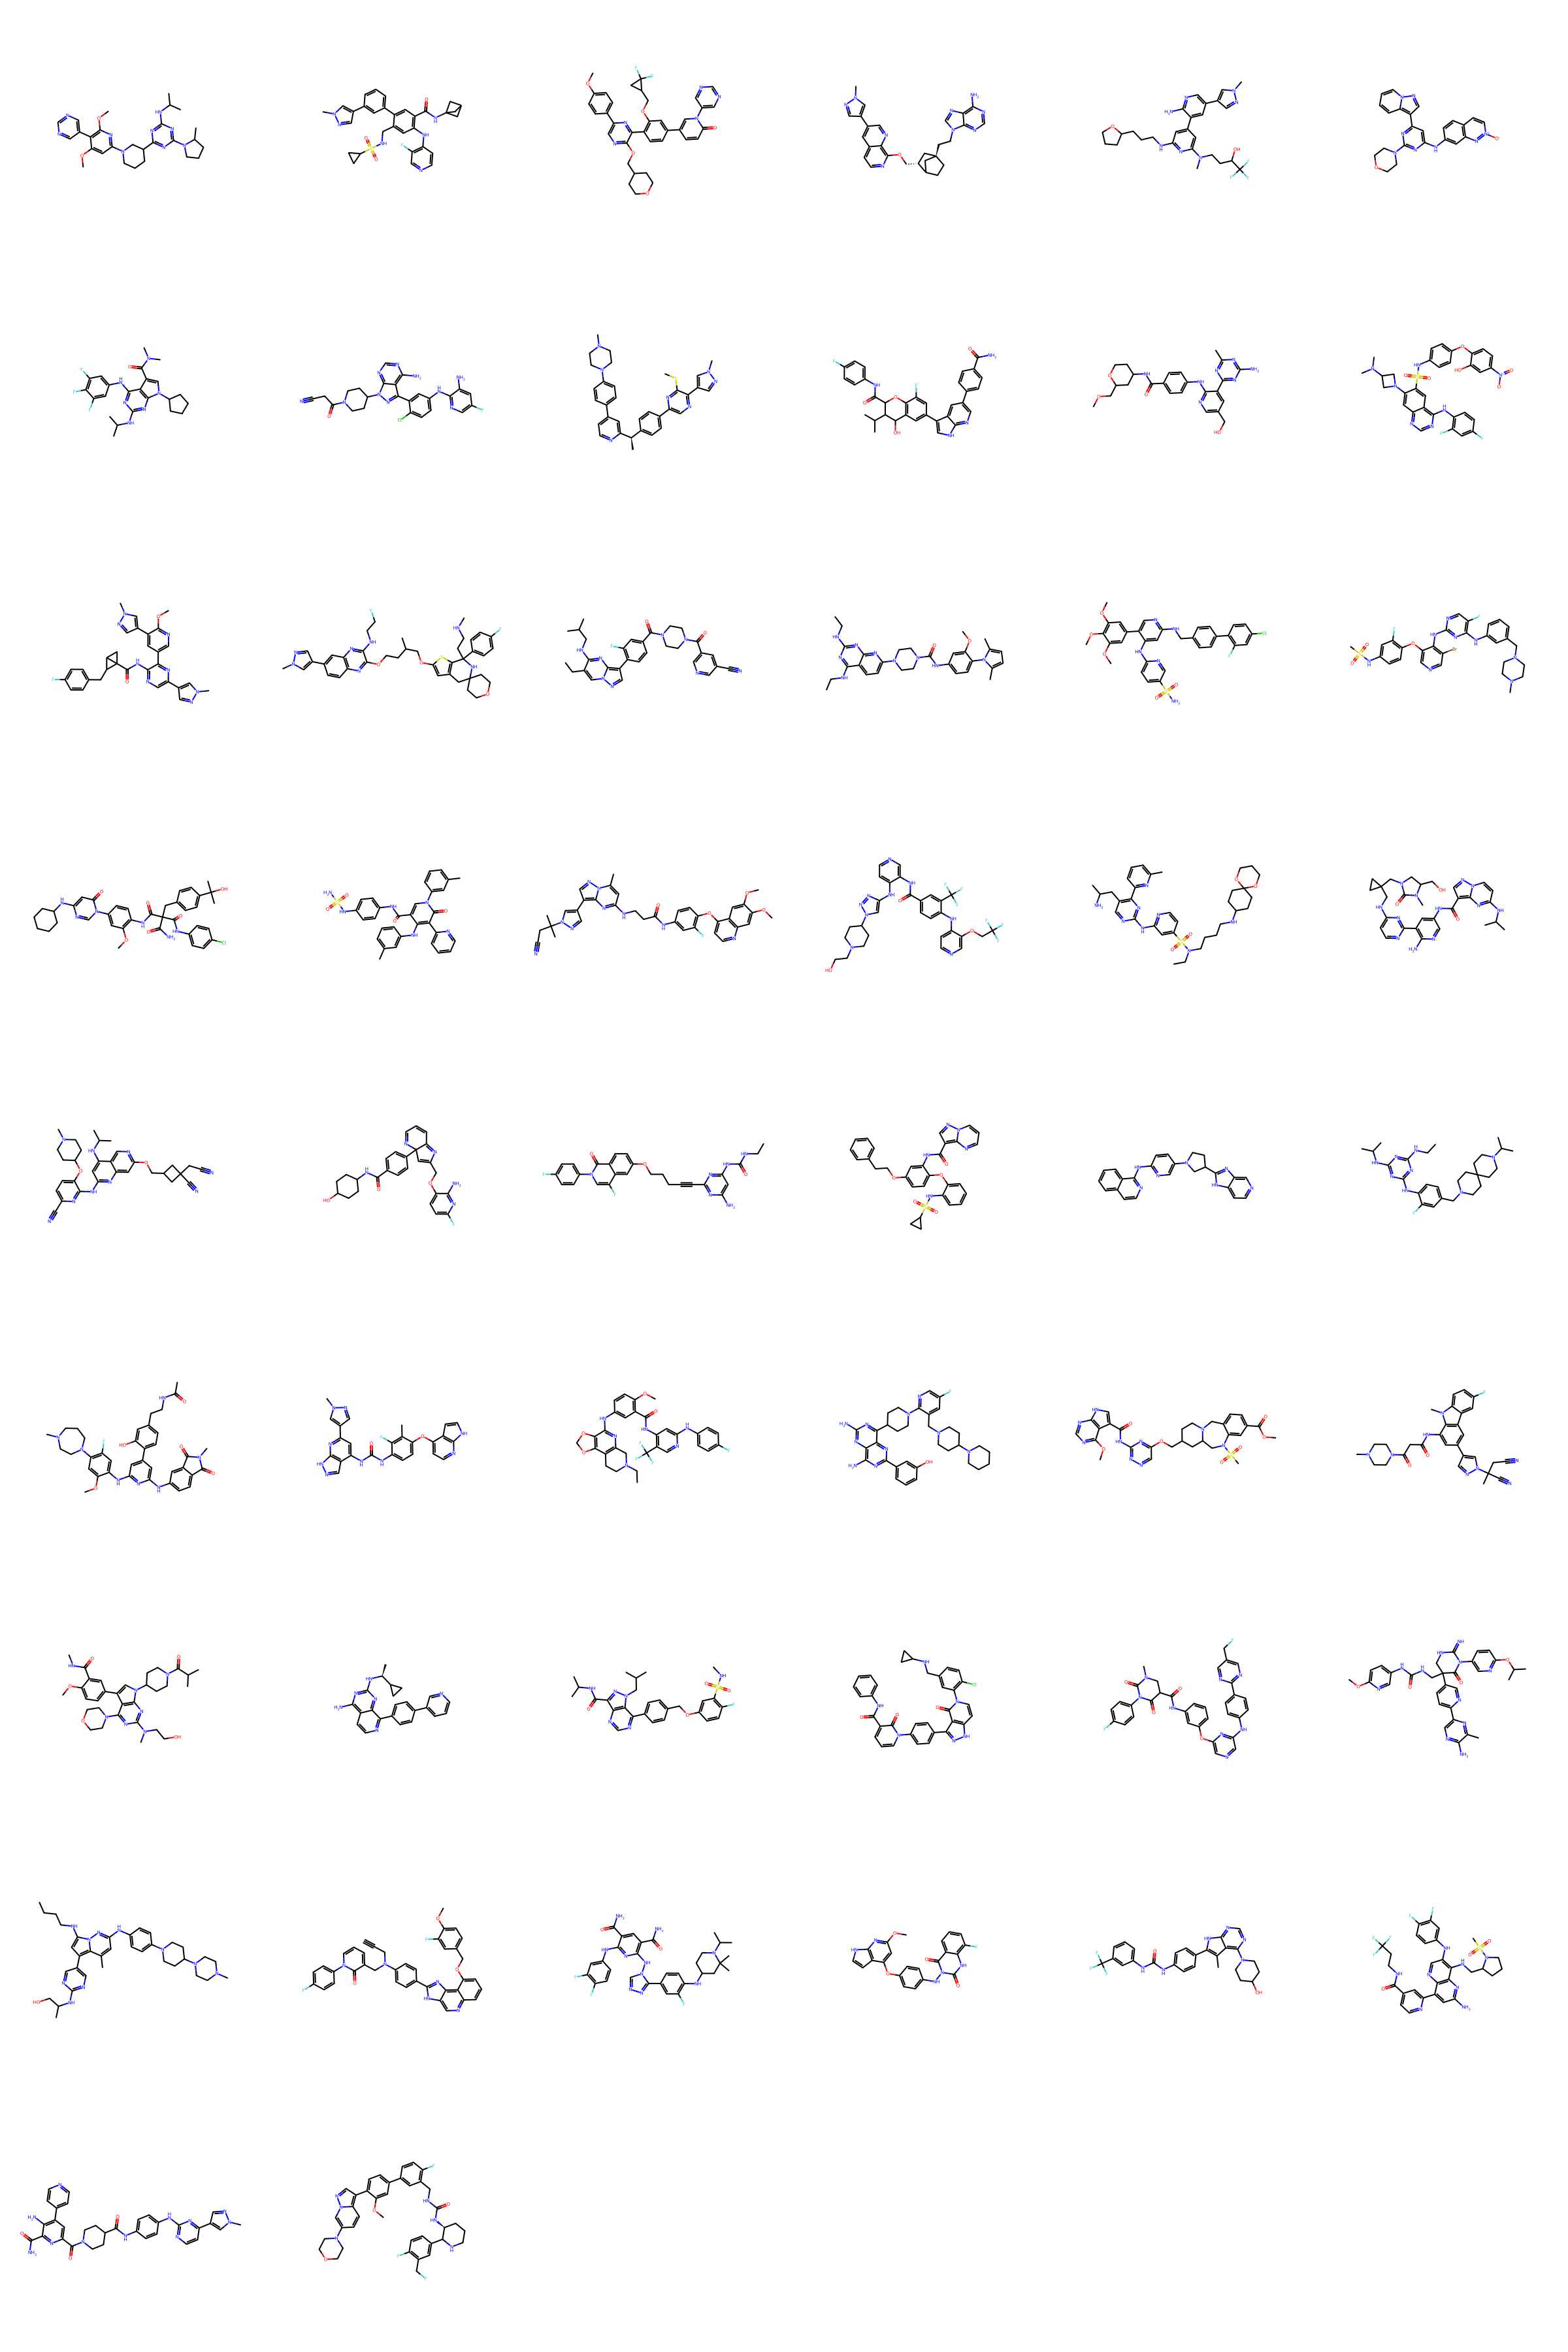

In [4]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem, rdMolDescriptors, rdPartialCharges, Draw
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import logging
import matplotlib.pyplot as plt
from torchmetrics.classification import MulticlassConfusionMatrix
from tqdm import tqdm
import sys


# Set device for computation (GPU if available, otherwise CPU)
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Calculate with: {torch.cuda.get_device_name(0)}")

else:
    device = torch.device("cpu")
    print(f"Calculate with: {device}")


# Function to calculate descriptors for a given SMILES string
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # If the SMILES string is invalid, return None
    
    descriptors = {
        "MorganFingerprint":    AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048),
        "AlogP":                Descriptors.MolLogP(mol),
        "PolarSurfaceArea":     Descriptors.TPSA(mol),
        "HBA":                  Descriptors.NumHAcceptors(mol),
        "HBD":                  Descriptors.NumHDonors(mol),
        "Chi0":                 Descriptors.Chi0(mol),
        "Kappa1":               Descriptors.Kappa1(mol),
        "TPSA":                 Descriptors.TPSA(mol),
        "MolLogP":              Descriptors.MolLogP(mol),
        "PEOE_VSA1":            Descriptors.PEOE_VSA1(mol),
        "PEOE_VSA2":            Descriptors.PEOE_VSA2(mol),
        "PEOE_VSA3":            Descriptors.PEOE_VSA3(mol),
        "PEOE_VSA4":            Descriptors.PEOE_VSA4(mol),
        "PEOE_VSA5":            Descriptors.PEOE_VSA5(mol),
        "PEOE_VSA6":            Descriptors.PEOE_VSA6(mol),
        "PEOE_VSA7":            Descriptors.PEOE_VSA7(mol),
        "PEOE_VSA8":            Descriptors.PEOE_VSA8(mol),
        "PEOE_VSA9":            Descriptors.PEOE_VSA9(mol),
        "PEOE_VSA10":           Descriptors.PEOE_VSA10(mol),
        "PEOE_VSA11":           Descriptors.PEOE_VSA11(mol),
        "PEOE_VSA12":           Descriptors.PEOE_VSA12(mol),
        "PEOE_VSA13":           Descriptors.PEOE_VSA13(mol),
        "PEOE_VSA14":           Descriptors.PEOE_VSA14(mol),
        "MolecularWeight":      Descriptors.MolWt(mol),
        "NumRotatableBonds":    Descriptors.NumRotatableBonds(mol),
        "NumAromaticRings":     Descriptors.NumAromaticRings(mol),
        #"MaxPartialCharge":     max_partial_charge,
        #"MinPartialCharge":     min_partial_charge,
        "FractionCSP3":         Descriptors.FractionCSP3(mol),
        #"RadiusOfGyration":     rdMolDescriptors.CalcRadiusOfGyration(mol),
        #"Polarizability":       rdMolDescriptors.CalcExactMolWt(mol),
        #"MolVolume":            Descriptors.MolWt(mol),
        #"MolWt":                Descriptors.MolWt(mol),
        "HeavyAtomCount":       Descriptors.HeavyAtomCount(mol),
        "NHOHCount":            Descriptors.NHOHCount(mol),
        "NOCount":              Descriptors.NOCount(mol),
        "NumHeteroatoms":       Descriptors.NumHeteroatoms(mol),
        "NumRadicalElectrons":  Descriptors.NumRadicalElectrons(mol),
        "NumValenceElectrons":  Descriptors.NumValenceElectrons(mol),
        "RingCount":            Descriptors.RingCount(mol),
        "BalabanJ":             Descriptors.BalabanJ(mol),
        "BertzCT":              Descriptors.BertzCT(mol),
        "Chi1":                 Descriptors.Chi1(mol),
        "Chi0n":                Descriptors.Chi0n(mol),
        "Chi0v":                Descriptors.Chi0v(mol),
        "Chi1n":                Descriptors.Chi1n(mol),
        "Chi1v":                Descriptors.Chi1v(mol),
        "Kappa2":               Descriptors.Kappa2(mol),
        "Kappa3":               Descriptors.Kappa3(mol),
        "HallKierAlpha":        Descriptors.HallKierAlpha(mol),
    }
    return descriptors


# Define model architecture
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.fc5 = nn.Linear(32, 8)
        self.bn5 = nn.BatchNorm1d(8)
        self.fc6 = nn.Linear(8, 2)
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x


# Prediction function for new SMILES
def predict_new_smiles(smiles_list, model_path, input_size):
    model = MLP(input_size)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()

    data = [calculate_descriptors(smiles) for smiles in smiles_list]
    df_new = pd.DataFrame(data)
    
    fingerprints = np.array([list(fp) for fp in df_new["MorganFingerprint"].values])
    fingerprints_df = pd.DataFrame(fingerprints, columns=[f"FP_{i}" for i in range(fingerprints.shape[1])])
    df_new = df_new.drop(columns=["MorganFingerprint"])
    df_new = pd.concat([df_new, fingerprints_df], axis=1)

    if df_new.shape[1] != input_size:
        raise ValueError(f"Number of features does not match: {df_new.shape[1]} instead of {input_size}")

    new_tensor = torch.tensor(df_new.values, dtype=torch.float32).to(device)
    
    with torch.no_grad():
        predictions = model(new_tensor)
        predicted_classes = torch.argmax(predictions, dim=1)

    return predicted_classes

# Function to count classes
def count_classes(predictions):
    axl_inhibitors = torch.sum(predictions == 1).item()
    compounds = torch.sum(predictions == 0).item()
    return axl_inhibitors, compounds

# Function to read SMILES from a file
def read_smiles_from_file(file_path):
    with open(file_path, 'r') as file:
        return file.read().splitlines()

# Draw SMILES and display them
def draw_smiles(smiles_list, predictions, filter_values, db_file_path=None):
    """
    Draws and displays SMILES structures, filtering by prediction values.
    Args:
        smiles_list (list of str): List of SMILES strings.
        predictions (torch.Tensor): Predicted classes for each SMILES.
        filter_values (str): Comma-separated list of class values to filter by.
        db_file_path (str, optional): Path to the database file for saving filtered SMILES (optional, not used here).
    """
    # Convert filter values (comma-separated) to a set of integers
    filter_set = set(map(int, filter_values.split(',')))
    
    # Filter SMILES and predictions based on the filter_set
    filtered_smiles = [smiles for smiles, pred in zip(smiles_list, predictions) if int(pred) in filter_set]
    filtered_predictions = [pred for pred in predictions if int(pred) in filter_set]
    
    # Convert SMILES to RDKit molecules
    molecules = [Chem.MolFromSmiles(smiles) for smiles in filtered_smiles]
    
    # Create legends based on predictions
    legends = [str(pred.item()) for pred in filtered_predictions]
    
    # Draw the molecules in a grid
    img = Draw.MolsToGridImage(molecules, molsPerRow=6, subImgSize=(400, 400))
    
    # Display the image
    display(img)

# Execution block
if __name__ == "__main__":
    file_path = 'C:\\Users\\SchockWav3\\Desktop\\Masterarbeit\\phase3_smiles1000.txt'
    model_path = 'C:\\Users\\SchockWav3\\Desktop\\müll.pth'
    input_size = 2048 + 43  # Adjust this based on the actual number of features (MorganFingerprints + Descriptors)

    smiles_list = read_smiles_from_file(file_path)
    predictions = predict_new_smiles(smiles_list, model_path, input_size)
    
    axl_inhibitors, compounds = count_classes(predictions)
    print(f"Number of AXL-Kinase Inhibitors: {axl_inhibitors}")
    print(f"Number of Compounds: {compounds}")
    
    # Set to True to visualize the first 100 AXL inhibitors
    show_molecules = True
    if show_molecules:
        draw_smiles(smiles_list, predictions, filter_values="1", db_file_path=None)

Displays all potential SMILES from the database

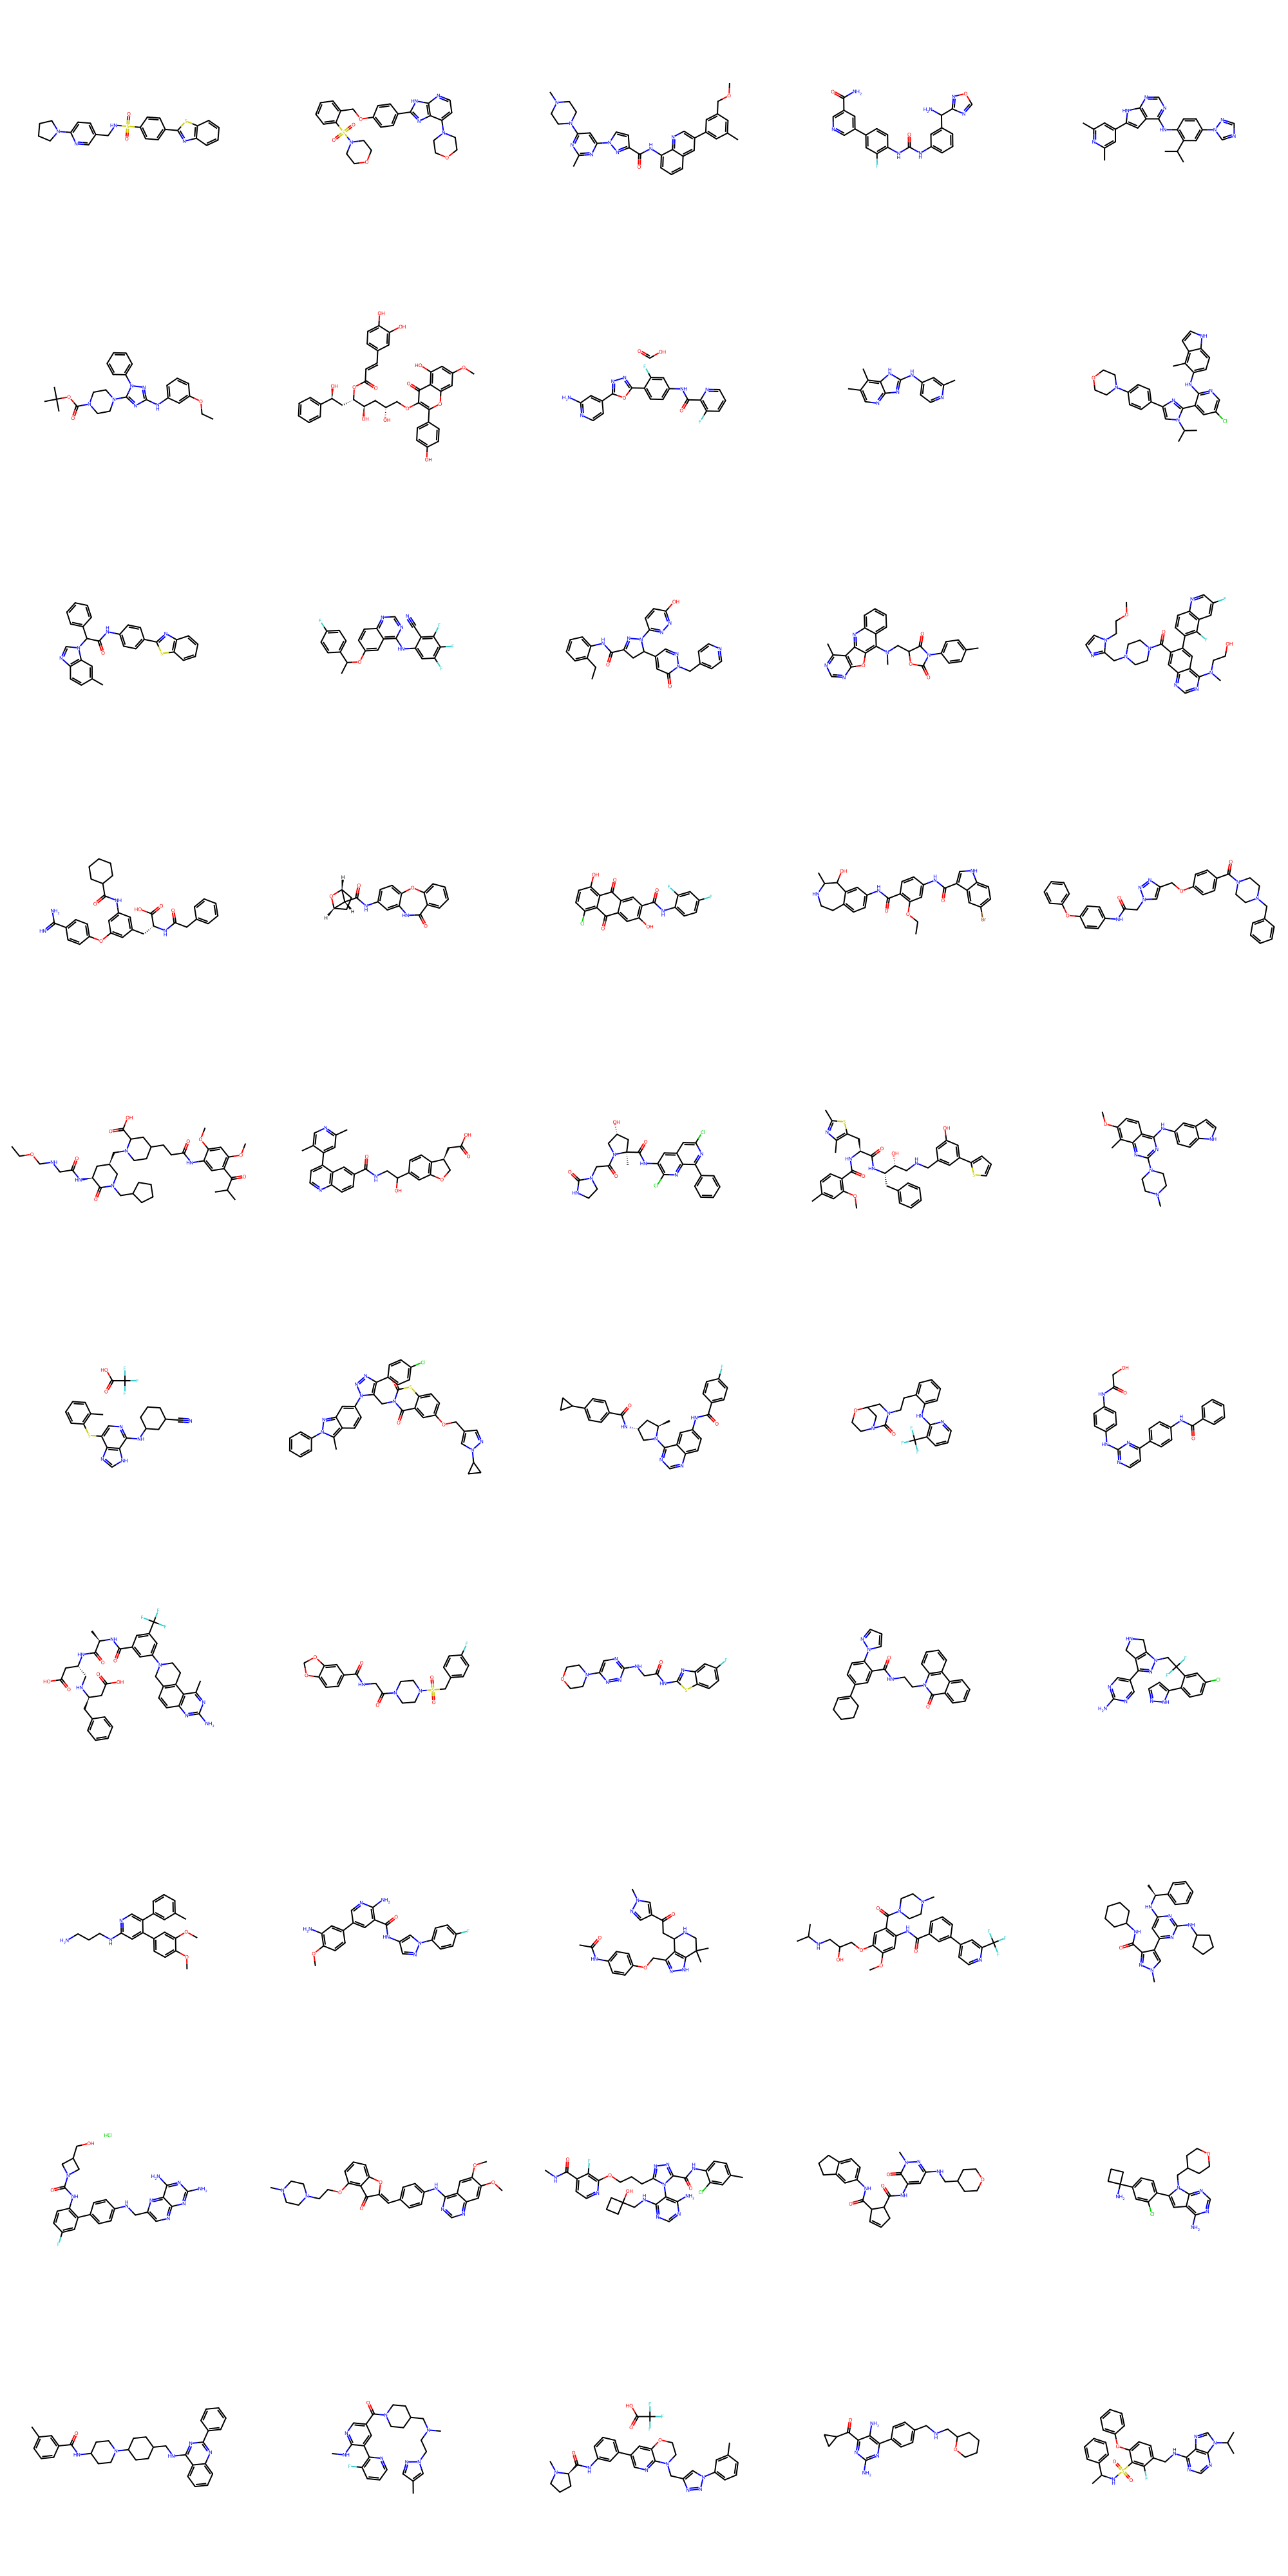

In [6]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem, rdMolDescriptors, rdPartialCharges, Draw
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import logging
import matplotlib.pyplot as plt
from torchmetrics.classification import MulticlassConfusionMatrix
from tqdm import tqdm
import sys


# Function to read SMILES from the database file
def read_smiles_from_db(db_file_path):
    """
    Reads SMILES strings from a database file.
    Args:
        db_file_path (str): Path to the database file.
    Returns:
        list of str: List of SMILES strings from the database.
    """
    with open(db_file_path, 'r') as db_file:
        smiles_list = db_file.read().splitlines()
    return smiles_list


# Function to draw SMILES from the database
def draw_smiles_from_db(smiles_list):
    """
    Draws SMILES structures from a given list of SMILES strings.
    Args:
        smiles_list (list of str): List of SMILES strings to be visualized.
    Returns:
        None: Displays an image grid of the molecular structures.
    """
    molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
    img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(400, 400))
    display(img)


# Define the database file path
db_file_path = 'C:\\Users\\SchockWav3\\Desktop\\Masterarbeit\\database_potential_axl_inhibitors.txt'


# Read SMILES from the database
smiles_from_db = read_smiles_from_db(db_file_path)


# Draw the SMILES structures from the database
draw_smiles_from_db(smiles_from_db)
